In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts

In [12]:
housing=fetch_california_housing()

In [13]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [14]:
X=pd.DataFrame(housing.data,columns=housing.feature_names)

In [15]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
y=pd.DataFrame(housing.target,columns=['target'])

In [17]:
y

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [18]:
Xtr,Xte,ytr,yte=tts(X,y,random_state=42)

In [19]:
Xtr,Xval,ytr,yval=tts(Xtr,ytr,random_state=42)

In [20]:
Xtr.shape

(11610, 8)

In [21]:
Xval.shape

(3870, 8)

In [24]:
Xtr.shape[1:]

(8,)

In [25]:
from keras.layers import Dense as dense
LAYERS=[
    dense(30,activation='relu',input_shape=Xtr.shape[1:]),
    dense(10,activation='relu'),
    dense(5,activation='relu'),
    dense(1)
]

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model=tf.keras.models.Sequential(LAYERS)

In [27]:
model.compile(optimizer='sgd',loss='mse')

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
scaler=StandardScaler()
Xtr=scaler.fit_transform(Xtr)
Xte=scaler.transform(Xte)
Xval=scaler.transform(Xval)

In [31]:
import os,time
def get_log_path(DIR_NAME='logs/fit'):
    fileName=time.strftime('log_%Y_%m_%d_%H_%M_%S')
    logs_path=os.path.join(DIR_NAME,fileName)
    print(f'Saving log file at {logs_path}')
    return logs_path

In [33]:
tb_cb=tf.keras.callbacks.TensorBoard(log_dir=get_log_path())

Saving log file at logs/fit\log_2024_04_03_17_09_48


In [34]:
history=model.fit(Xtr,ytr,epochs=20,validation_data=(Xval,yval),callbacks=[tb_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3374 - val_loss: 0.3468
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.3140 - val_loss: 0.3347
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.2940 - val_loss: 0.3508
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.3123 - val_loss: 0.3597
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 0.3020 - val_loss: 0.3340
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3097 - val_loss: 0.3668
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3208 - val_loss: 0.3415
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.3027 - val_loss: 0.3179
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.3073 - val_loss: 0.3214
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.2917 - val_loss: 0.3140
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.2958 - val_loss: 0.3142
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━

<Axes: >

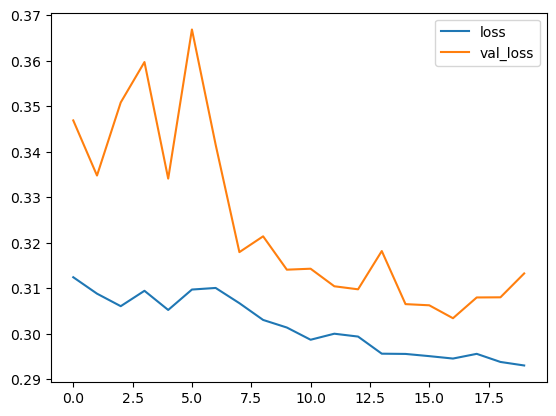

In [35]:
pd.DataFrame(history.history).plot()

In [36]:
new=Xte[0]

In [38]:
new.shape

(8,)

In [41]:
new.reshape((1,8)).shape

(1, 8)

In [43]:
model.predict(new.reshape((1,8)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0.7422547]], dtype=float32)

In [48]:
model_2=tf.keras.models.Sequential(LAYERS)
model_2.compile(loss='mse',optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint('my_keras_model.keras',save_best_only=True)
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
tb_cb=tf.keras.callbacks.TensorBoard(log_dir=get_log_path())

Saving log file at logs/fit\log_2024_04_03_17_32_03


In [49]:
import h5py

In [52]:
history=model_2.fit(Xtr,ytr,epochs=20,validation_data=(Xval,yval),callbacks=[checkpoint_cb,tb_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2869 - val_loss: 0.2997
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2801 - val_loss: 0.2993
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.2820 - val_loss: 0.3006
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.2929 - val_loss: 0.2996
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.2705 - val_loss: 0.3009
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2736 - val_loss: 0.3014
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.2817 - val_loss: 0.3030
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.2754 - val_loss: 0.3016
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.2733 - val_loss: 0.3016
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.2909 - val_loss: 0.3012
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.2679 - val_loss: 0.3029
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━

In [53]:
%load_ext tensorboard

In [54]:
%tensorboard --logdir='logs'